<a href="https://colab.research.google.com/github/varamba/Ya_practicum_projects/blob/main/project_Yandex_estate_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

Необходимо провести предобработку и исследовательский анализ данных.
- Разобраться с дупликатами, аномалиями и пропусками.
- Привести таблицу в нормальынй вид(поправить типы данных, добавить столбцы, изменить единицы измерения в некоторых столбцах)
- Найти зависимости стоимости квартир от различных параметров
- Построить графики

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


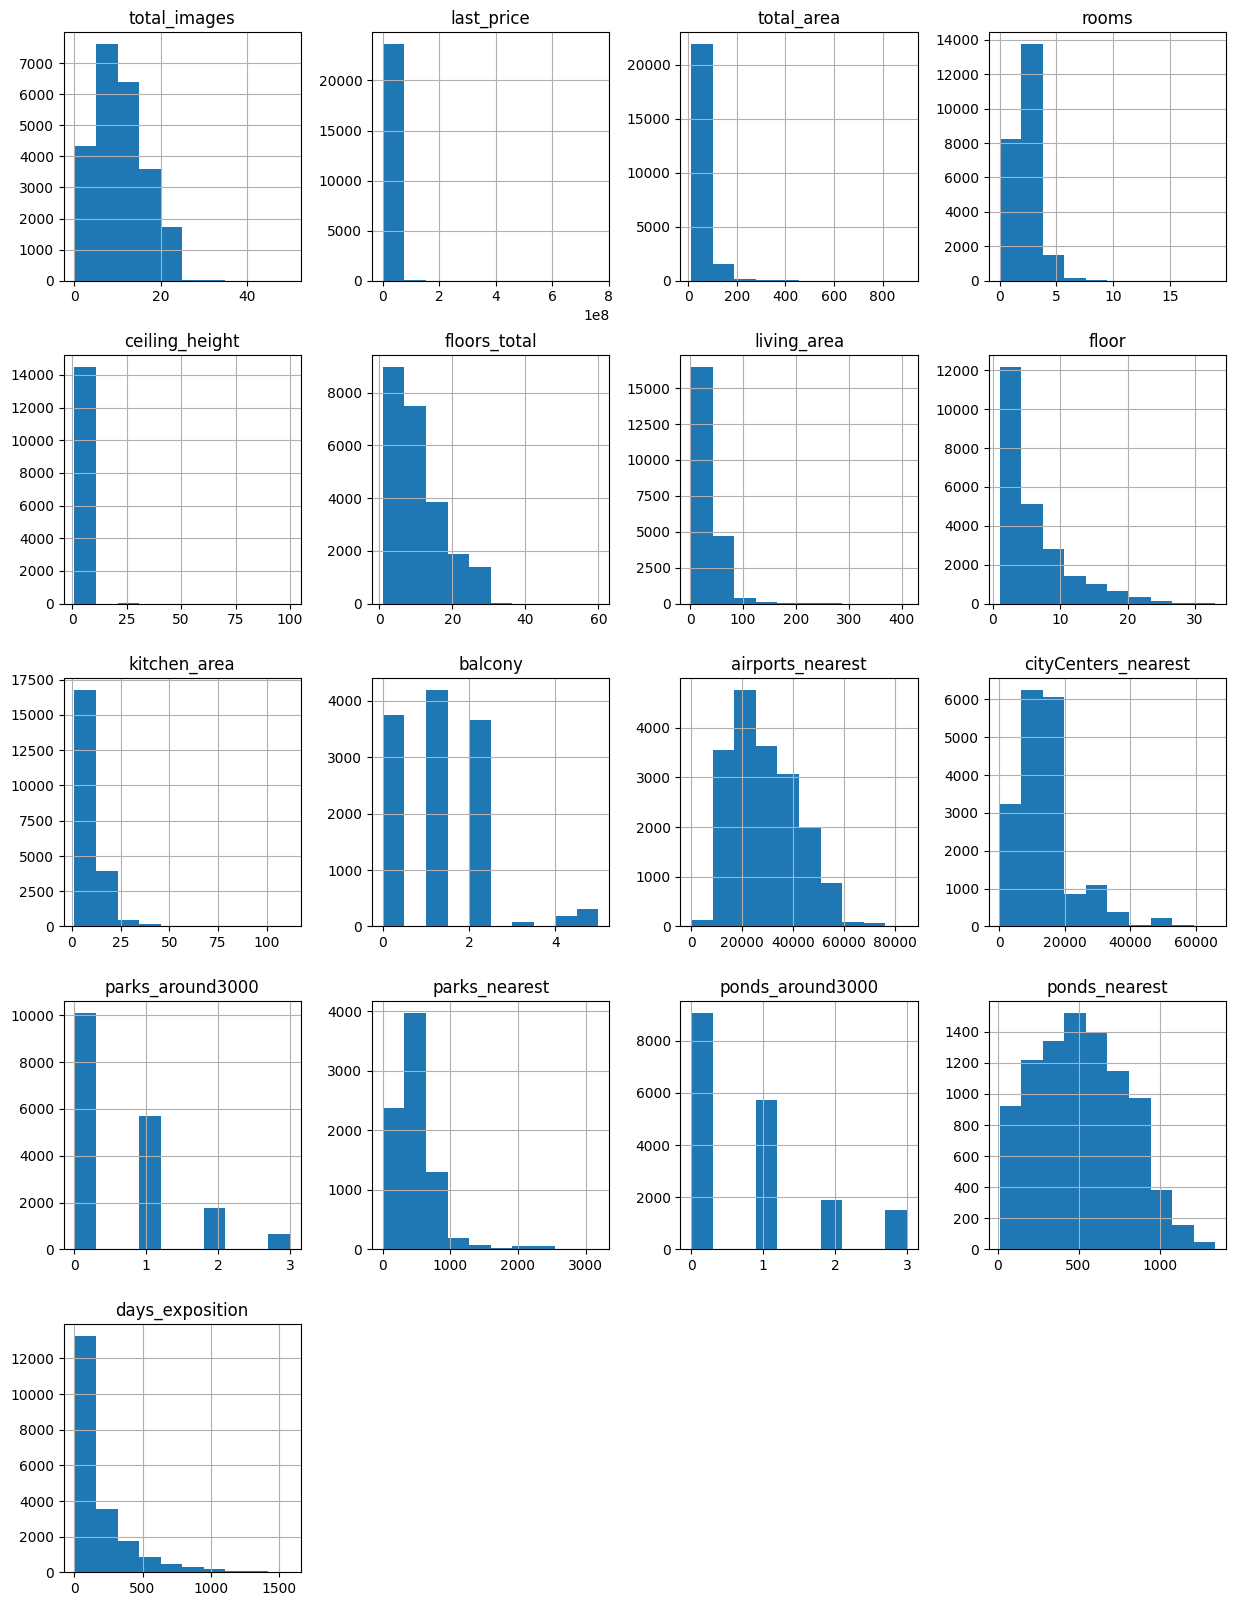

In [6]:
df.hist(figsize=(15,20));

### Предобработка данных

Судя по обзору данных, в глаза бросаются несколько аномальных значений:

Максимальная высота потолка 100м, минимальная 1м.

Также видим аномалии в мин\макс площади квартиры и кухни.

Количество комнат.

Минимальное расстояние до аэропорта 0 м (квартира в аэропорту? вряд ли).

Рассмотрим данные категории подробнее прежде чем заполнять пропуски.

In [7]:
df.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

В данных найдено очень большое количество пропусков, а именно:

**ceiling_height**: высота потолков; удалить аномальные значения, остальные пропуски придется оставить, тк их очень много, и удаление может повлиять на общую картину.

**floors_total**: всего этажей в доме; замена пропусков невозможна.

**living_area**: жилая площадь; замена пропусков в зависимости от общей площади.

**is_apartment**: апартаменты; неправильынй тип данных, замена на булев тип, возможо замена пропусков значением False(необходимо смотреть подробнее эту категорию).

**kitchen_area**: площадь кухни, замена пропусков в зависимости от общей площади.

**balcony**: количесво балконов, замена пропусков на 0, изменение типа данных на целочисленный.

**locality_name**: название населенного пункта, замена пропусков невозможна(неизвестно название), придется удалять.

**airports_nearest**: расстояние до аэропорта, замена пропусков невозможна(рядом нет аэропорта).

**cityCenters_nearest**: расстояние до центра, замена пропусков невозможна(неизвестно).

**parks_around3000**: число парков в радиусе 3000м, замена пропусков на 0(парков рядом нет), замена типа данных на целочисленный.

**parks_nearest**: расстояние до ближайшего парка(возможно парка нет), замена пропусков невозможна.

**ponds_around3000**: число прудов в радиусе 3000м, замена пропусков на 0(прудов рядом нет), замена типа данных на целочисленный.

**ponds_nearest**: расстояние до ближайшего пруда, замена пропусков невозможна(прудов рядом нет).

**days_exposition**: количество дней со дня публикации до снятия, замена пропусков невозможна(возможно объявление не закрыто)

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0').set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

In [9]:
pass_value_barh(df)

пропусков не осталось :) 


Также необходимо найти дупликаты.

In [10]:
df.duplicated().sum()

0

Явных дупликатов не найдено.

In [11]:
df['locality_name'] = df['locality_name'].str.lower()
df.duplicated().sum()

0

In [12]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
df.duplicated().sum()

0

In [13]:
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок', regex=True)
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок', regex=True)
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'снт', regex=True)
df['locality_name'] = df['locality_name'].str.replace('садоводческое товарищество', 'ст', regex=True)
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество', 'ст', regex=True)
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок', 'поселок', regex=True)
df.duplicated().sum()

0

In [14]:
df['locality_name'].unique().tolist()

['санкт-петербург',
 'поселок шушары',
 'поселок янино-1',
 'поселок парголово',
 'поселок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'коммунар',
 'колпино',
 'поселок красный бор',
 'гатчина',
 'деревня федоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'поселок металлострой',
 'поселок лебяжье',
 'поселок сиверский',
 'поселок молодцово',
 'поселок кузьмоловский',
 'ст новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'поселок аннино',
 'поселок ефимовский',
 'поселок плодовое',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'поселок понтонный',
 'сясьстрой',
 'деревня старая',
 'деревня лесколово',
 'поселок новый свет',
 'сланцы',
 'село путилово',
 'ивангород',
 'мурино',
 'шлиссельбург',
 'никольское',
 'зеленогорск',
 'сосновый бор',
 'деревня оржицы',
 'деревня кальтино',
 'кудрово',
 

In [15]:
# check
df['locality_name'].nunique()

321

После манипуляций со строками дупликатов не обнаружено, осталось удалить пропуски, тк объявления без названия жилого пункта помешают анализу, да и пользователю такие объявления не нужны.

In [16]:
df['locality_name'].isna().sum()

49

In [17]:
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

Далее разберемся с высотой потолков.

In [18]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [19]:
df['ceiling_height'].isna().sum()

9160

Судя по данным в интернете, минимальная высота потолка составляет 2.7м, а максимальная 4м (дома сталинской застройки), остальные значения явно выбиваются, соответсвенно можно удалить все значения превышающие эту границу. Возможно в объявлениях присутствуют частные дома с высотой более 4м, но это тоже не очень похоже на правду.

#### check ceiling

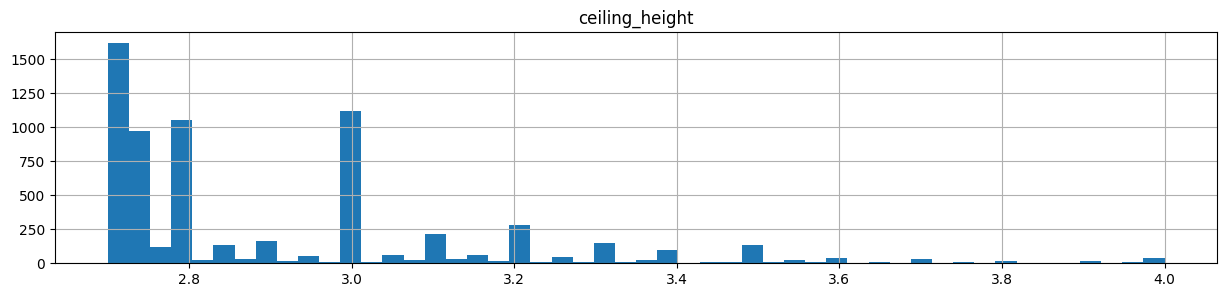

In [20]:
# check
df.hist(column = 'ceiling_height', bins = 50, figsize = (15,3), range = (2.7, 4));

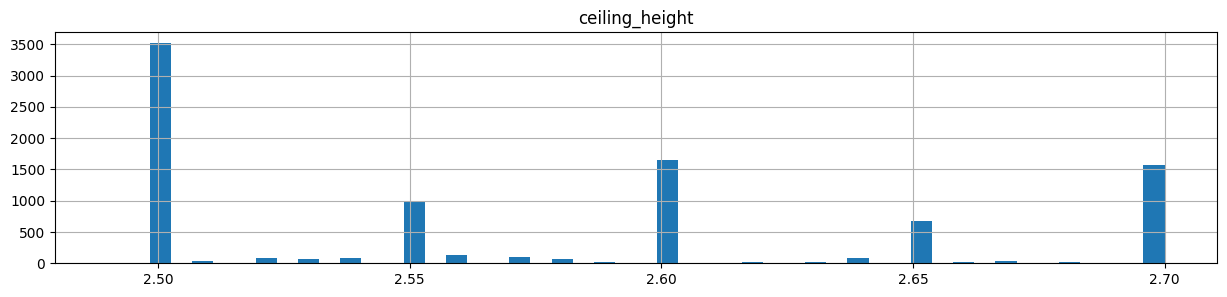

In [21]:
# check
df.hist(column = 'ceiling_height', bins = 50, figsize = (15,3), range = (2.49, 2.7));

In [22]:
df.query('ceiling_height > 4 | ceiling_height < 2.5').sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.00,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,False,False,10.00,NaN,санкт-петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,поселок мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.6,9,NaN,False,False,8.80,2.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
19329,5,1700000.0,40.00,2018-07-15T00:00:00,2,2.00,9.0,NaN,8,NaN,False,False,NaN,NaN,сосновый бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.0,2,False,False,False,8.60,2.0,поселок большая ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.00,2017-04-18T00:00:00,1,27.50,24.0,37.7,19,False,False,False,11.00,2.0,санкт-петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22336,19,9999000.0,92.40,2019-04-05T00:00:00,2,32.00,6.0,55.5,5,False,False,False,16.50,4.0,санкт-петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.00,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,NaN,False,False,8.00,NaN,волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN


7700 значений из 23 тысяч, достаточно большой кусок данных, но он явно не попадает под жилые стандарты, возможно стоить отправить данные на проверку в техподдержку, но сейчас придется их удалить, а пропуски оставить(пользователь просто мог не указать высоту).

In [23]:
df = df.loc[(df['ceiling_height']<=4)&(df['ceiling_height']>=2.5)|(df['ceiling_height'].isna())]

In [24]:
df['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       3.5 , 3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54,
       2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 3.6 , 2.92,
       3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53, 2.74, 2.96,
       2.79, 2.95, 2.94, 3.82, 3.54, 3.53, 2.83, 3.38, 3.01, 3.65, 3.9 ,
       3.18, 3.35, 3.57, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75,
       2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 3.24, 3.36, 3.08, 3.68, 3.07,
       3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 2.68, 3.22, 3.27,
       2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 3.28, 3.04,
       3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 3.39, 2.69, 3.31, 3.56, 3.51,
       3.93, 3.42, 2.99, 3.49, 2.91, 3.88, 3.29, 3.76, 3.69, 2.89, 3.58,
       3.48, 3.59])

In [25]:
df['ceiling_height'].isna().sum()

9160

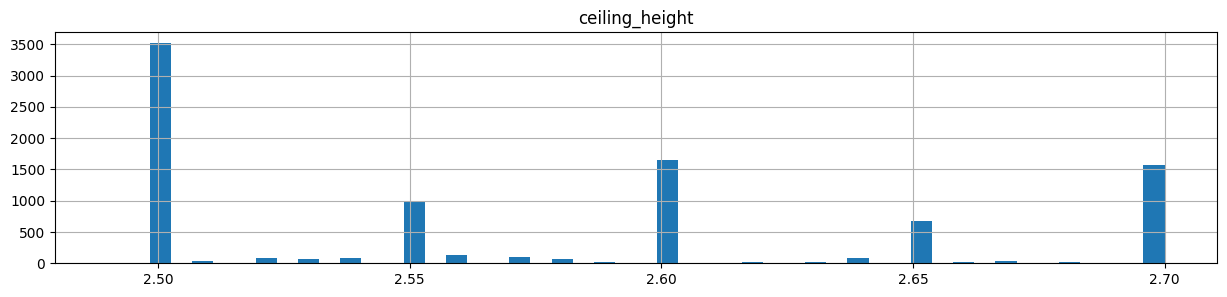

In [26]:
# check
df.hist(column = 'ceiling_height', bins = 50, figsize = (15,3), range = (2.49, 2.7));

Новый "чек" по значениям, все сошлось.

Проверим промежуточные данные

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23502 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23502 non-null  int64  
 1   last_price            23502 non-null  float64
 2   total_area            23502 non-null  float64
 3   first_day_exposition  23502 non-null  object 
 4   rooms                 23502 non-null  int64  
 5   ceiling_height        14342 non-null  float64
 6   floors_total          23417 non-null  float64
 7   living_area           21616 non-null  float64
 8   floor                 23502 non-null  int64  
 9   is_apartment          2727 non-null   object 
 10  studio                23502 non-null  bool   
 11  open_plan             23502 non-null  bool   
 12  kitchen_area          21253 non-null  float64
 13  balcony               12052 non-null  float64
 14  locality_name         23502 non-null  object 
 15  airports_nearest   

In [28]:
df.isnull().sum().sort_values()

total_images                0
locality_name               0
open_plan                   0
floor                       0
studio                      0
first_day_exposition        0
total_area                  0
rooms                       0
last_price                  0
floors_total               85
living_area              1886
kitchen_area             2249
days_exposition          3156
ponds_around3000         5465
parks_around3000         5465
cityCenters_nearest      5466
airports_nearest         5486
ceiling_height           9160
balcony                 11450
ponds_nearest           14477
parks_nearest           15501
is_apartment            20775
dtype: int64

Заменим пропуски в колонке апартаменты нулями и поменяем тип данных.

In [29]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [30]:
df['is_apartment'] = df['is_apartment'].fillna(0)

In [31]:
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0})

In [32]:
df['is_apartment'].unique()

array([0, 1])

Далее разберемся с площадями квартир и кухонь.

In [33]:
df.query('total_area > 539 | total_area < 11').sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,0,False,False,100.0,NaN,санкт-петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,0,False,False,70.0,NaN,санкт-петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,0,False,False,60.0,NaN,санкт-петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.9,4.0,322.3,4,0,False,False,19.5,1.0,санкт-петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,0,False,False,112.0,NaN,санкт-петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


По найденым данным в интернете (материалы аналитиков ЦИАН), максимальная площадь самой большой квартиры в Питере составляет 539кв м, а минимальная 11 кв м, значит остальные значения отбрасываем.

In [34]:
df = df.loc[(df['total_area']<=539)]

Далее подставим значения в жилую площадь и площадь кухни в зависимости разности от общей площади и типа квартиры(студия).

In [35]:
df.loc[df['is_apartment'] == True, 'kitchen_area'] = 0

In [36]:
df['kitchen_area'].isna().sum()

2234

In [37]:
df['living_area'] = df['living_area'].fillna(0.9*df['total_area']-df['kitchen_area'])
df['kitchen_area'] = df['kitchen_area'].fillna(0.9*df['total_area']-df['living_area'])

<ipython-input-37-37e9fb131b4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['living_area'] = df['living_area'].fillna(0.9*df['total_area']-df['kitchen_area'])
<ipython-input-37-37e9fb131b4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kitchen_area'] = df['kitchen_area'].fillna(0.9*df['total_area']-df['living_area'])


In [38]:
df.isnull().sum().sort_values()

total_images                0
locality_name               0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total               85
living_area              1443
kitchen_area             1443
days_exposition          3154
parks_around3000         5465
ponds_around3000         5465
cityCenters_nearest      5466
airports_nearest         5486
ceiling_height           9159
balcony                 11446
ponds_nearest           14476
parks_nearest           15497
dtype: int64

In [39]:
df.query('kitchen_area < 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,0,True,False,-0.351,2.0,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
2959,9,2550000.0,32.00,2017-12-02T00:00:00,1,NaN,14.0,30.20,13,0,False,False,-1.400,1.0,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,157.0
7415,0,6500000.0,67.00,2017-06-17T00:00:00,2,NaN,18.0,63.00,18,0,False,False,-2.700,NaN,санкт-петербург,18428.0,16134.0,1.0,739.0,1.0,758.0,298.0
7857,11,150000000.0,230.00,2017-10-25T00:00:00,8,NaN,8.0,220.00,8,0,False,False,-13.000,NaN,санкт-петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,135.0
8683,10,3500000.0,32.50,2016-05-05T00:00:00,1,3.00,23.0,29.90,11,0,True,False,-0.650,2.0,санкт-петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0
9861,10,2350000.0,25.00,2017-12-03T00:00:00,0,NaN,22.0,25.00,17,0,False,True,-2.500,2.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.0
10606,14,2950000.0,25.27,2017-11-17T00:00:00,0,NaN,25.0,25.00,11,0,False,True,-2.257,1.0,санкт-петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,51.0
12412,0,3300000.0,27.00,2017-08-15T00:00:00,0,NaN,25.0,25.00,22,0,False,True,-0.700,NaN,санкт-петербург,12199.0,12111.0,0.0,NaN,1.0,337.0,161.0
12691,1,3700000.0,24.20,2017-11-10T00:00:00,0,NaN,19.0,24.20,13,0,False,True,-2.420,1.0,санкт-петербург,17837.0,16840.0,0.0,NaN,2.0,210.0,74.0
16606,8,6695000.0,58.00,2018-10-11T00:00:00,2,NaN,6.0,54.00,6,0,False,False,-1.800,NaN,санкт-петербург,31877.0,5347.0,2.0,231.0,3.0,537.0,42.0


Повились отрицательные значения в площади кухни. Возможно из-за того, что жилая площадь почти равна общей, такое вряд ли может быть, только если это студия, но в табличке видно, что все это обычные квартиры. Я считаю нужноих удалить, тк их не так много, но они помешают расчетам. Да и данные в этих квартирах придется перепроверить на сайте.

In [40]:
df = df.loc[df['kitchen_area']>=0]

Подставим медиану в оставшиеся, в зависимости от категории квартиры.

In [41]:
def area_cat(row):
    area=row['total_area']
    if (area < 30):
        return 'apartments'
    if (area < 38):
        return '1_room'
    if area < 56:
        return '2_rooms'
    if area < 78:
        return '3_rooms'
    if area < 108:
        return '4_rooms'
    if area < 162:
        return '5_rooms'
    return 'other'

df['area_category']=df.apply(area_cat, axis=1)
for x in df['area_category'].unique():
    df.loc[(df['area_category'] == x) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['area_category'] == x), 'living_area'].median()
df['living_area'].isna().sum()

0

In [42]:
for x in df['area_category'].unique():
    df.loc[(df['area_category'] == x) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['area_category'] == x), 'kitchen_area'].median()

In [43]:
df['kitchen_area'].isna().sum()

0

In [44]:
df.isnull().sum().sort_values()

total_images                0
locality_name               0
kitchen_area                0
studio                      0
is_apartment                0
floor                       0
living_area                 0
open_plan                   0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
area_category               0
floors_total               52
days_exposition          3044
parks_around3000         4997
ponds_around3000         4997
cityCenters_nearest      4998
airports_nearest         5016
ceiling_height           8260
balcony                 10256
ponds_nearest           13548
parks_nearest           14492
dtype: int64

Заменим пропуски балконов, парков и прудов нулями.

In [45]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Удалим пропуски этажей.

In [46]:
df['floor'] = df['floor'].dropna()

Заменим типы данных.

In [47]:
df['balcony'] = df['balcony'].astype('int')

In [48]:
df['parks_around3000'] = df['parks_around3000'].astype('int')

In [49]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

In [50]:
df['floor'] = df['floor'].astype('int')

Поменяем формат даты.

In [51]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [52]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000,8,0,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,5_rooms
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600,1,0,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2_rooms
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300,4,0,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,3_rooms
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000,13,0,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,4_rooms
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.400,5,0,False,False,9.10,0,поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,1_room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300,3,0,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,5_rooms
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.000,4,0,False,False,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN,45.0,3_rooms
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700,1,0,False,False,21.33,0,село рождествено,NaN,NaN,0,NaN,0,NaN,NaN,3_rooms
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,45.775,12,0,False,False,23.30,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,3_rooms


In [53]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22041 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22041 non-null  int64         
 1   last_price            22041 non-null  float64       
 2   total_area            22041 non-null  float64       
 3   first_day_exposition  22041 non-null  datetime64[ns]
 4   rooms                 22041 non-null  int64         
 5   ceiling_height        13781 non-null  float64       
 6   floors_total          21989 non-null  float64       
 7   living_area           22041 non-null  float64       
 8   floor                 22041 non-null  int64         
 9   is_apartment          22041 non-null  int64         
 10  studio                22041 non-null  bool          
 11  open_plan             22041 non-null  bool          
 12  kitchen_area          22041 non-null  float64       
 13  balcony         

In [54]:
# check
df.rooms.value_counts().to_frame()

,rooms
1,7479
2,7395
3,5427
4,1097
5,294
0,176
6,96
7,50
8,11
9,7


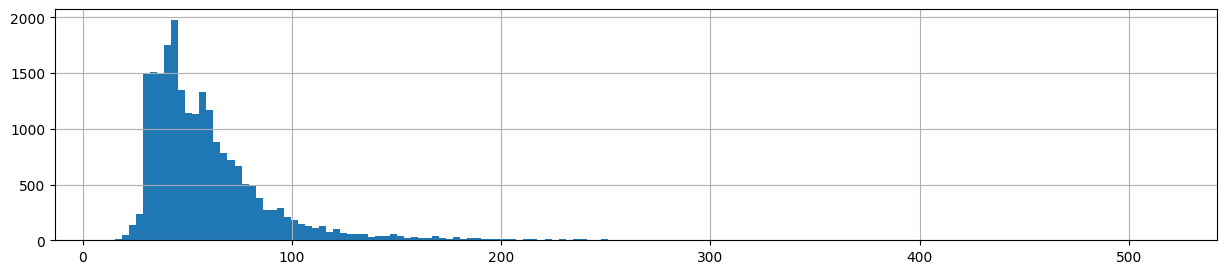

In [55]:
# check
df.total_area.hist(bins = 150, figsize = (15,3));

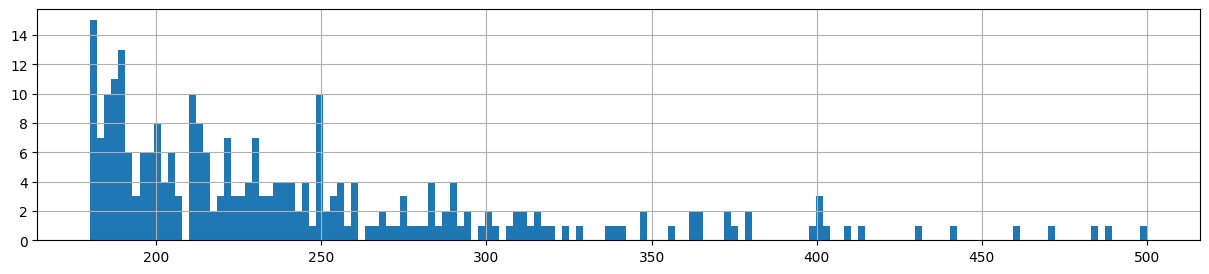

In [56]:
# check
df.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [57]:
df.query('total_area > 250')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
155,8,96000000.0,317.0,2017-07-07,4,3.50,3.0,183.0,3,0,False,False,102.3,1,санкт-петербург,22673.0,1771.0,2,508.0,3,366.0,62.0,other
660,3,49950000.0,483.9,2017-10-04,7,3.20,6.0,312.5,4,0,False,False,26.4,0,санкт-петербург,23079.0,945.0,3,461.0,3,22.0,391.0,other
793,20,135000000.0,310.0,2018-05-22,4,3.30,5.0,250.0,2,0,False,False,50.0,0,санкт-петербург,34159.0,7251.0,2,295.0,3,190.0,342.0,other
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,0,False,False,16.6,0,санкт-петербург,38076.0,7950.0,0,NaN,2,435.0,418.0,other
1085,16,75000000.0,323.0,2017-07-10,5,4.00,5.0,255.7,4,0,False,False,66.0,0,санкт-петербург,23713.0,594.0,3,398.0,2,515.0,259.0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,16,148000000.0,256.0,2016-03-16,5,NaN,6.0,179.0,5,0,False,False,36.0,0,санкт-петербург,24072.0,3639.0,2,727.0,3,462.0,233.0,other
22238,12,19500000.0,287.5,2017-12-27,7,NaN,4.0,183.7,3,0,False,False,26.0,0,санкт-петербург,21881.0,4726.0,1,578.0,1,853.0,90.0,other
22345,8,53250000.0,290.0,2017-09-25,6,2.90,7.0,180.0,6,0,False,False,18.0,1,санкт-петербург,25512.0,6079.0,3,427.0,0,NaN,134.0,other
22835,20,29000000.0,275.0,2018-07-27,5,NaN,17.0,180.0,17,0,False,False,17.0,0,санкт-петербург,37593.0,13114.0,1,570.0,3,502.0,91.0,other


98 очень больших квартир, думаю они нам не понадобятся.

In [58]:
df = df.loc[(df['total_area'] < 250)]

Посмотрим сколько квартир осталось с большим количеством комнат.

In [59]:
df.query('rooms > 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,0,False,False,13.3,0,санкт-петербург,23606.0,3148.0,0,NaN,0,NaN,NaN,other
813,7,16500000.0,229.0,2016-02-25,8,NaN,6.0,160.0,5,0,False,False,25.0,0,санкт-петербург,23968.0,4536.0,1,243.0,0,NaN,806.0,other
4435,13,22190000.0,191.2,2017-12-05,8,2.90,6.0,115.8,1,0,False,False,5.0,0,санкт-петербург,21589.0,1152.0,1,587.0,2,155.0,115.0,other
8758,5,16100000.0,150.0,2018-07-10,8,2.92,5.0,107.0,1,0,False,False,7.2,0,санкт-петербург,26080.0,4782.0,2,473.0,0,NaN,NaN,5_rooms
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,0,False,False,11.9,0,санкт-петербург,21469.0,1015.0,1,686.0,2,66.0,813.0,other
12447,8,19900000.0,210.3,2016-04-18,8,3.30,5.0,144.6,2,0,False,False,23.6,0,санкт-петербург,24770.0,5864.0,2,283.0,0,NaN,102.0,other
13019,0,22250000.0,249.9,2019-04-23,9,3.20,5.0,157.0,5,0,False,False,12.4,0,санкт-петербург,10328.0,9987.0,2,352.0,0,NaN,NaN,other
17203,2,35300000.0,235.0,2018-11-15,8,4.00,4.0,162.0,3,0,False,False,26.0,0,санкт-петербург,19728.0,1799.0,3,123.0,3,50.0,7.0,other
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,0,False,False,19.8,0,санкт-петербург,24353.0,4921.0,1,368.0,0,NaN,11.0,other
18945,4,15800000.0,236.4,2015-02-19,8,NaN,6.0,176.6,6,0,False,False,22.6,0,санкт-петербург,20221.0,1802.0,3,571.0,3,441.0,921.0,other


In [60]:
df = df.loc[(df['rooms'] < 8)]

In [61]:
# check2
df.query('rooms > 7 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category


In [62]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21937.000000,2.193700e+04,21937.000000,21937.000000,13718.000000,21886.000000,21937.000000,21937.000000,21937.000000,21937.000000,21937.000000,16922.000000,16940.000000,21937.000000,7481.000000,21937.000000,8422.000000,18913.000000
mean,9.980034,6.165469e+06,58.854109,2.047956,2.720318,10.708352,33.891898,5.908055,0.002006,10.523279,0.622236,28833.394161,14286.811806,0.466290,488.995722,0.589187,519.575160,184.090467
std,5.656247,6.855075e+06,28.359067,1.011187,0.253290,6.580075,18.877838,4.879873,0.044742,5.772123,0.974569,12673.308902,8638.457893,0.742864,340.483007,0.882083,277.290292,221.158184
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.520000,5.000000,18.700000,2.000000,0.000000,7.000000,0.000000,18539.000000,9421.750000,0.000000,287.000000,0.000000,297.250000,44.000000
50%,10.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,0.000000,9.100000,0.000000,26811.000000,13144.000000,0.000000,451.000000,0.000000,503.000000,100.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,16.000000,42.300000,8.000000,0.000000,12.000000,1.000000,37402.750000,16302.000000,1.000000,611.000000,1.000000,732.750000,237.000000
max,50.000000,3.300000e+08,249.700000,7.000000,4.000000,60.000000,204.234000,33.000000,1.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


После анализа данных категории было найдено несколько аномальных значений, нужно их посмотреть подробнее.

Проверим квартиру миллиардера.
763 млн рублей за квартирку 400кв м, лучше ее убрать, а так же другие очень дорогие квартиры, их очень мало и они сильно сдвигают статистику.

In [63]:
df.query('last_price > 100000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,0,False,False,40.0,0,санкт-петербург,23011.0,1197.0,3,519.0,3,285.0,233.0,other
1928,11,125000000.0,224.5,2017-01-24,4,NaN,4.0,163.5,3,0,False,False,30.0,1,санкт-петербург,22805.0,2335.0,0,NaN,2,497.0,174.0,other
2536,16,159984000.0,242.4,2015-08-27,4,3.85,9.0,131.0,7,0,False,False,20.0,0,санкт-петербург,21946.0,2242.0,1,679.0,1,227.0,501.0,other
4996,20,124000000.0,124.5,2017-10-12,4,3.00,4.0,67.2,2,0,False,False,20.0,0,санкт-петербург,20399.0,1722.0,3,302.0,3,172.0,45.0,5_rooms
13864,20,130000000.0,231.0,2015-08-13,6,3.60,6.0,148.0,4,0,False,False,12.0,0,санкт-петербург,22992.0,1280.0,3,395.0,3,170.0,467.0,other
16647,15,122000000.0,145.0,2017-04-25,3,3.30,6.0,36.0,2,0,False,False,72.0,0,санкт-петербург,33931.0,7023.0,2,478.0,3,250.0,335.0,5_rooms
17912,17,135000000.0,166.0,2019-02-07,3,3.30,7.0,52.0,1,0,False,False,64.0,0,санкт-петербург,32863.0,5955.0,2,230.0,3,215.0,NaN,other
19155,20,160000000.0,243.0,2018-11-12,5,NaN,5.0,145.0,4,0,False,False,33.0,0,санкт-петербург,22640.0,555.0,3,285.0,1,200.0,18.0,other
21023,17,124350000.0,248.7,2015-08-27,4,3.40,9.0,131.0,4,0,False,False,23.0,0,санкт-петербург,21946.0,2242.0,1,679.0,1,227.0,501.0,other
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,0,False,False,30.2,0,санкт-петербург,22494.0,1073.0,3,386.0,3,188.0,NaN,other


In [64]:
df = df.loc[(df['last_price']< 100000000)]

In [65]:
df.query('last_price < 700000').sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
2296,6,650000.0,26.40,2018-03-18,1,2.50,2.0,17.0,2,0,False,False,9.4,0,поселок гаврилово,NaN,NaN,0,NaN,0,NaN,35.0,apartments
1358,10,550000.0,27.60,2019-03-06,1,2.50,5.0,17.0,2,0,False,False,6.0,0,сланцы,NaN,NaN,0,NaN,0,NaN,22.0,apartments
22997,9,560000.0,28.50,2018-08-11,1,2.60,4.0,17.2,4,0,False,False,5.7,1,пикалево,NaN,NaN,0,NaN,0,NaN,198.0,apartments
17298,10,690000.0,28.66,2018-02-23,1,2.53,2.0,16.7,2,0,False,False,8.1,0,выборг,NaN,NaN,0,NaN,0,NaN,NaN,apartments
10782,3,490000.0,29.10,2016-05-05,1,2.50,5.0,17.0,5,0,False,False,5.5,0,сланцы,NaN,NaN,0,NaN,0,NaN,719.0,apartments
12607,11,530000.0,29.60,2019-02-20,1,NaN,5.0,16.0,3,0,False,False,5.8,0,сланцы,NaN,NaN,0,NaN,0,NaN,27.0,apartments
1861,6,600000.0,30.00,2017-12-19,1,NaN,3.0,17.0,3,0,False,False,6.0,0,сланцы,NaN,NaN,0,NaN,0,NaN,114.0,1_room
15548,20,630000.0,30.00,2016-04-02,1,2.55,5.0,16.0,3,0,False,False,5.5,0,сланцы,NaN,NaN,0,NaN,0,NaN,924.0,1_room
22430,6,520000.0,30.00,2017-09-15,1,NaN,2.0,18.0,1,0,False,False,5.5,0,сланцы,NaN,NaN,0,NaN,0,NaN,163.0,1_room
11108,16,630000.0,30.00,2019-01-02,1,2.50,5.0,17.0,5,0,False,False,6.0,1,сланцы,NaN,NaN,0,NaN,0,NaN,98.0,1_room


Есть квартира за 12 тыс рублей, неплохое предложение.

In [66]:
df.query('last_price < 700000').sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
2296,6,650000.0,26.40,2018-03-18,1,2.50,2.0,17.0,2,0,False,False,9.4,0,поселок гаврилово,NaN,NaN,0,NaN,0,NaN,35.0,apartments
1358,10,550000.0,27.60,2019-03-06,1,2.50,5.0,17.0,2,0,False,False,6.0,0,сланцы,NaN,NaN,0,NaN,0,NaN,22.0,apartments
22997,9,560000.0,28.50,2018-08-11,1,2.60,4.0,17.2,4,0,False,False,5.7,1,пикалево,NaN,NaN,0,NaN,0,NaN,198.0,apartments
17298,10,690000.0,28.66,2018-02-23,1,2.53,2.0,16.7,2,0,False,False,8.1,0,выборг,NaN,NaN,0,NaN,0,NaN,NaN,apartments
10782,3,490000.0,29.10,2016-05-05,1,2.50,5.0,17.0,5,0,False,False,5.5,0,сланцы,NaN,NaN,0,NaN,0,NaN,719.0,apartments
12607,11,530000.0,29.60,2019-02-20,1,NaN,5.0,16.0,3,0,False,False,5.8,0,сланцы,NaN,NaN,0,NaN,0,NaN,27.0,apartments
1861,6,600000.0,30.00,2017-12-19,1,NaN,3.0,17.0,3,0,False,False,6.0,0,сланцы,NaN,NaN,0,NaN,0,NaN,114.0,1_room
15548,20,630000.0,30.00,2016-04-02,1,2.55,5.0,16.0,3,0,False,False,5.5,0,сланцы,NaN,NaN,0,NaN,0,NaN,924.0,1_room
22430,6,520000.0,30.00,2017-09-15,1,NaN,2.0,18.0,1,0,False,False,5.5,0,сланцы,NaN,NaN,0,NaN,0,NaN,163.0,1_room
11108,16,630000.0,30.00,2019-01-02,1,2.50,5.0,17.0,5,0,False,False,6.0,1,сланцы,NaN,NaN,0,NaN,0,NaN,98.0,1_room


Не уверен на счет квартир до миллиона рублей, может быть это очень старые дома, но вот за 12 тыс рублей квартирку придется убрать.

In [67]:
df = df.loc[(df['last_price']> 100000)]

Посмотрим на квартиру в аэоропорту.

In [68]:
df.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,0,False,False,6.0,2,санкт-петербург,0.0,22801.0,0,NaN,0,NaN,60.0,1_room


9ти этажка прямо в аэропорте, прикольно, но вряд ли такое возможно.

In [69]:
#Снесем 9ти-этажку, чтобы не мешала взлету
df = df.loc[(df['airports_nearest']!=0)]

Осталась квартира в одном метре от парка.

In [70]:
df.query('parks_nearest < 10').sort_values('parks_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
14624,8,3770000.0,45.4,2019-03-20,2,NaN,9.0,28.43,2,0,False,False,6.9,0,санкт-петербург,43932.0,16436.0,1,1.0,0,NaN,42.0,2_rooms
11949,7,4500000.0,44.0,2017-11-24,2,2.6,9.0,30.00,7,0,False,False,7.0,0,санкт-петербург,11806.0,12292.0,1,3.0,1,508.0,82.0,2_rooms
22941,8,10965000.0,69.3,2019-01-10,1,3.0,4.0,48.90,4,1,False,False,0.0,2,зеленогорск,73391.0,54490.0,3,4.0,1,217.0,110.0,3_rooms
9344,12,3000000.0,28.1,2017-07-25,1,2.5,9.0,17.00,1,0,False,False,5.6,0,санкт-петербург,12051.0,11665.0,1,7.0,1,780.0,440.0,apartments
2527,8,4690000.0,60.3,2016-03-05,2,2.5,5.0,28.00,2,0,False,False,7.9,0,кронштадт,69775.0,51500.0,3,9.0,3,345.0,146.0,3_rooms
20193,3,11809670.0,102.6,2017-04-21,3,NaN,9.0,74.54,3,0,False,False,17.8,2,санкт-петербург,27562.0,6410.0,2,9.0,2,480.0,90.0,4_rooms


Есть пару значений менее 10 метров, но думаю, их можно оставить. Не знаю сколько должно быть минимальное расстояние от дома до парка, но будем считать что все в норме.

Ну и что там с прудами.

In [71]:
df.query('ponds_nearest < 10').sort_values('ponds_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category


Проверка площадей кухонь.

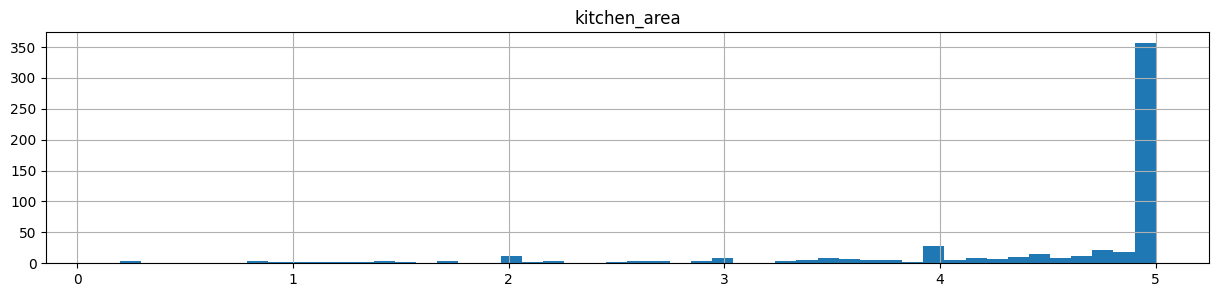

In [72]:
# check
df.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0.1,5));

In [73]:
df.query('kitchen_area < 5 and kitchen_area > 0.1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
76,12,2800000.0,55.1,2016-05-14,3,2.60,5.0,38.40,1,0,False,False,4.90,0,кировск,NaN,NaN,0,NaN,0,NaN,606.0,2_rooms
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,0,False,False,4.54,0,санкт-петербург,22041.0,17369.0,0,NaN,1,374.0,251.0,apartments
298,9,2650000.0,42.8,2017-04-25,2,NaN,5.0,30.00,3,0,False,False,4.50,0,гатчина,NaN,NaN,0,NaN,0,NaN,49.0,2_rooms
422,8,1700000.0,55.2,2018-03-24,3,2.50,5.0,38.50,5,0,False,False,4.50,0,кириши,NaN,NaN,0,NaN,0,NaN,NaN,2_rooms
424,14,11500000.0,98.0,2016-05-10,3,2.65,3.0,88.00,3,0,False,False,0.20,1,санкт-петербург,39363.0,13270.0,0,NaN,0,NaN,90.0,4_rooms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,0,5800000.0,66.0,2017-06-09,5,NaN,5.0,55.50,1,0,False,False,3.90,0,санкт-петербург,12007.0,11933.0,0,NaN,0,NaN,21.0,3_rooms
23110,1,2900000.0,34.0,2018-02-01,2,2.90,2.0,20.00,1,0,False,False,4.00,0,поселок стрельна,27006.0,23832.0,0,NaN,2,872.0,196.0,1_room
23191,3,1900000.0,18.9,2016-04-04,1,NaN,16.0,16.00,12,0,False,False,1.01,0,тосно,NaN,NaN,0,NaN,0,NaN,115.0,apartments
23579,7,2350000.0,24.8,2018-06-07,1,NaN,10.0,18.00,2,0,False,False,4.32,0,кудрово,NaN,NaN,0,NaN,0,NaN,89.0,apartments


In [74]:
df = df.loc[(df['kitchen_area'] >= 5)|(df['kitchen_area'] < 0.1)]

Удалил странные значение площадей кухонь.

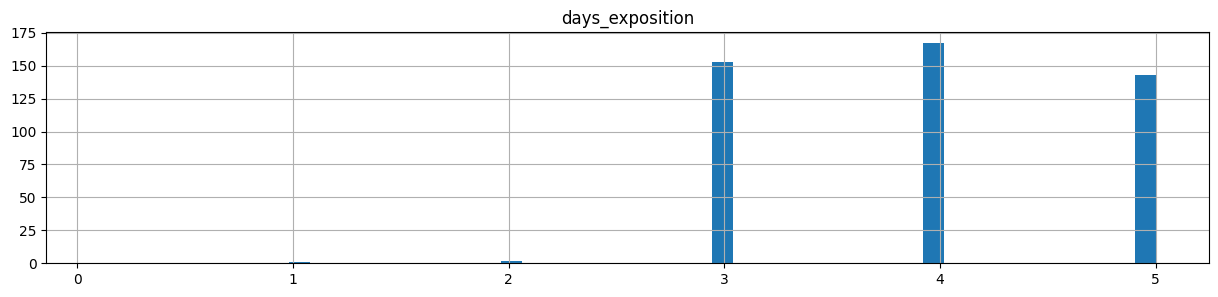

In [75]:
# check
df.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0.1,5));

### Посчитайте и добавьте в таблицу новые столбцы

Добавим ценник за 1 кв м

In [76]:
df['1m_price'] = df['last_price']/df['total_area']
df['1m_price'] = df['1m_price'].round(decimals=2)

In [77]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category,1m_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000,8,0,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,5_rooms,120370.37
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600,1,0,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2_rooms,82920.79
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300,4,0,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,3_rooms,92785.71
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000,13,0,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,4_rooms,100000.00
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.400,5,0,False,False,9.10,0,поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,1_room,95065.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300,3,0,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,5_rooms,72490.85
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.000,4,0,False,False,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN,45.0,3_rooms,52542.37
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700,1,0,False,False,21.33,0,село рождествено,NaN,NaN,0,NaN,0,NaN,NaN,3_rooms,44091.71
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,45.775,12,0,False,False,23.30,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,3_rooms,149511.40


Добавим столбцы c днем, месяцем и годом.

In [78]:
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

In [79]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category,1m_price,day_of_week_exposition,month_exposition,year_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000,8,0,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,5_rooms,120370.37,Thursday,March,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600,1,0,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2_rooms,82920.79,Tuesday,December,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300,4,0,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,3_rooms,92785.71,Thursday,August,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000,13,0,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,4_rooms,100000.00,Tuesday,June,2018
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.400,5,0,False,False,9.10,0,поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,1_room,95065.79,Monday,September,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300,3,0,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,5_rooms,72490.85,Tuesday,March,2017
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.000,4,0,False,False,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN,45.0,3_rooms,52542.37,Monday,January,2018
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700,1,0,False,False,21.33,0,село рождествено,NaN,NaN,0,NaN,0,NaN,NaN,3_rooms,44091.71,Sunday,February,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,45.775,12,0,False,False,23.30,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,3_rooms,149511.40,Tuesday,March,2017


Добавим тип этажа.

In [80]:
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] < 0:
        return 'подвал'
    elif row['floor'] == 0:
        return 'полуподвал'
    else:
        return 'другой'

In [81]:
df['floor_status'] = df.apply(floor_status, axis=1)

In [82]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category,1m_price,day_of_week_exposition,month_exposition,year_exposition,floor_status
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000,8,0,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,5_rooms,120370.37,Thursday,March,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600,1,0,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2_rooms,82920.79,Tuesday,December,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300,4,0,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,3_rooms,92785.71,Thursday,August,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000,13,0,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,4_rooms,100000.00,Tuesday,June,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.400,5,0,False,False,9.10,0,поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,1_room,95065.79,Monday,September,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300,3,0,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,5_rooms,72490.85,Tuesday,March,2017,другой
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.000,4,0,False,False,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN,45.0,3_rooms,52542.37,Monday,January,2018,другой
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700,1,0,False,False,21.33,0,село рождествено,NaN,NaN,0,NaN,0,NaN,NaN,3_rooms,44091.71,Sunday,February,2018,первый
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,45.775,12,0,False,False,23.30,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,3_rooms,149511.40,Tuesday,March,2017,другой


Изменим все расстояния на км.

In [83]:
df['to_center_km'] = (df['cityCenters_nearest'] / 1000).round()
df['to_airport_km'] = (df['airports_nearest'] / 1000).round()
df['to_park_km'] = (df['parks_nearest'] / 1000).round()
df['to_pond_km'] = (df['ponds_nearest'] / 1000).round()

In [84]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category,1m_price,day_of_week_exposition,month_exposition,year_exposition,floor_status,to_center_km,to_airport_km,to_park_km,to_pond_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000,8,0,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,5_rooms,120370.37,Thursday,March,2019,другой,16.0,19.0,0.0,1.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600,1,0,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2_rooms,82920.79,Tuesday,December,2018,первый,19.0,13.0,NaN,NaN
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300,4,0,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,3_rooms,92785.71,Thursday,August,2015,другой,14.0,22.0,0.0,1.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000,13,0,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,4_rooms,100000.00,Tuesday,June,2018,другой,8.0,32.0,0.0,0.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.400,5,0,False,False,9.10,0,поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,1_room,95065.79,Monday,September,2018,другой,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300,3,0,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,5_rooms,72490.85,Tuesday,March,2017,другой,4.0,25.0,1.0,0.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.000,4,0,False,False,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN,45.0,3_rooms,52542.37,Monday,January,2018,другой,NaN,NaN,NaN,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700,1,0,False,False,21.33,0,село рождествено,NaN,NaN,0,NaN,0,NaN,NaN,3_rooms,44091.71,Sunday,February,2018,первый,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,45.775,12,0,False,False,23.30,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,3_rooms,149511.40,Tuesday,March,2017,другой,10.0,39.0,0.0,0.0


### Проведите исследовательский анализ данных

Построим гистограммы.

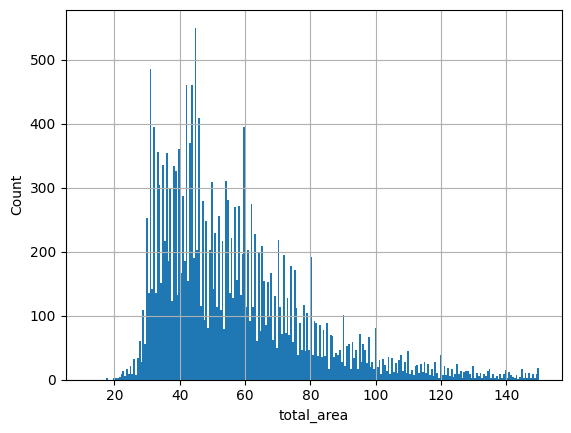

In [85]:
ax=df['total_area'].hist(bins = 250, range = (12, 150)).set_xlabel('total_area');
plt.ylabel('Count');

Наблюдаем небольшое количество больших квартир, возможно остались совмещенные квартиры или целые этажи зданий, может быть офис, хотя данные должны быть для квартир.
Cмотрим остальные категории.

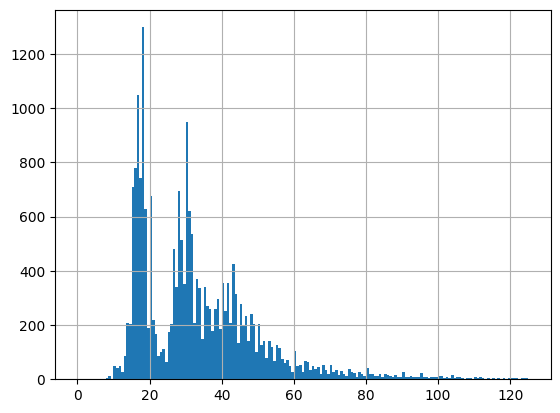

In [86]:
df['living_area'].hist(bins = 175, range=(0, 125));

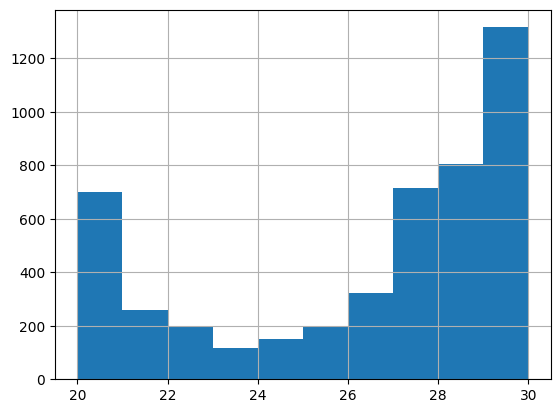

In [87]:
df['living_area'].hist(bins = 10, range=(20, 30));

Очень странный провал в площадях в районе 24 км м.

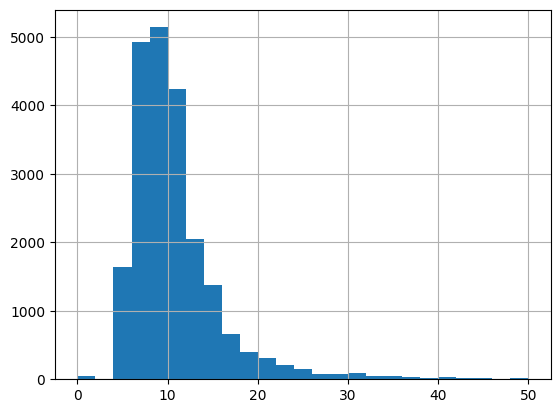

In [88]:
df['kitchen_area'].hist(bins = 25, range =(0, 50));

Нудевые кухни это студии, остальное выглядит приемлимо.

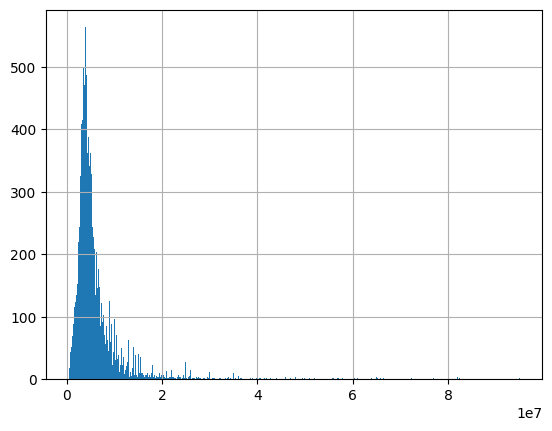

In [89]:
df['last_price'].hist(bins = 1000);

(1000000.0, 15000000.0)

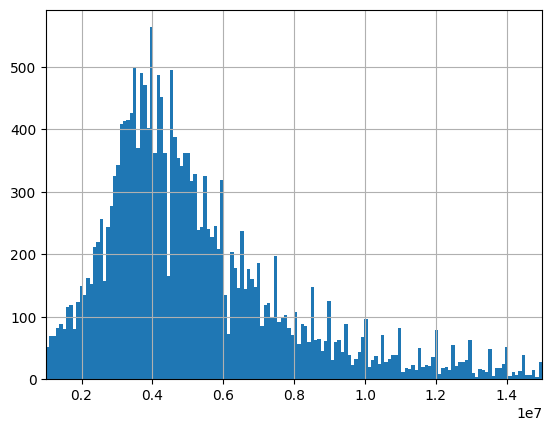

In [90]:
df['last_price'].hist(bins = 1000);
plt.xlim([1000000, 15000000])

В целом хорошее распределение.

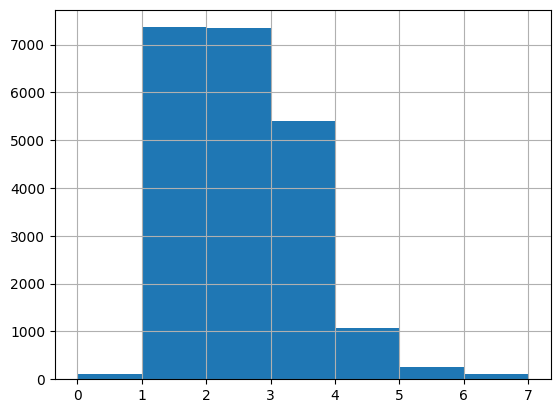

In [91]:
df['rooms'].hist(bins=7);

Однушек и двушек примерно поровну, но это потому что имеются студии.

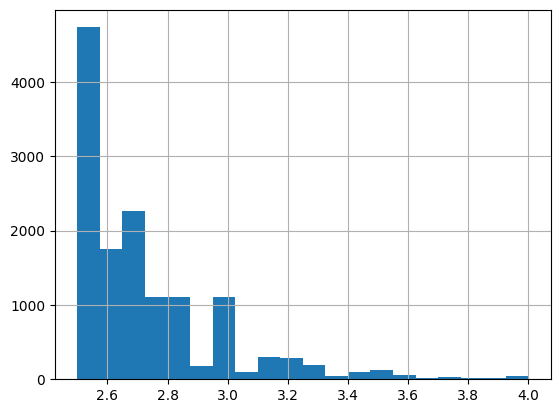

In [92]:
df['ceiling_height'].hist(bins = 20, range=(2.5, 4));

Хорошее распределение, тем более, что ранее уже были отброшены мега потолки в 100м. Осталось небольшое количесво квартир с относительно высоким потолком, возможно это сталинки и частные дома, возможен вариант двухуровневых квартир, но я не знаю как там считаются потолки.

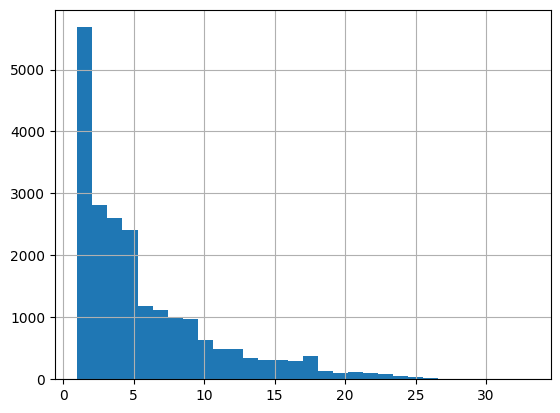

In [93]:
df['floor'].hist(bins=30);

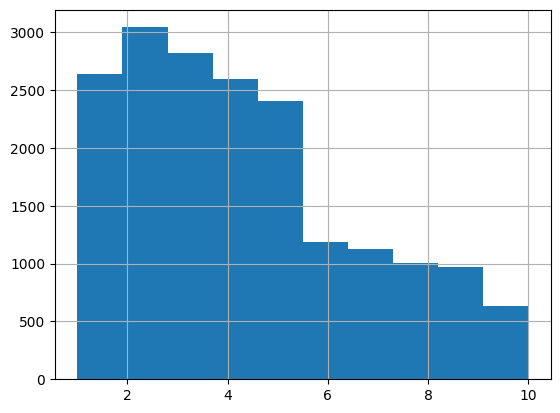

In [94]:
df['floor'].hist(bins = 10, range=(1, 10));

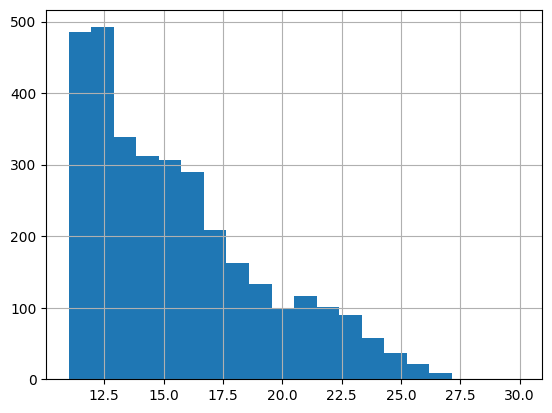

In [95]:
df['floor'].hist(bins = 20, range=(11, 30));

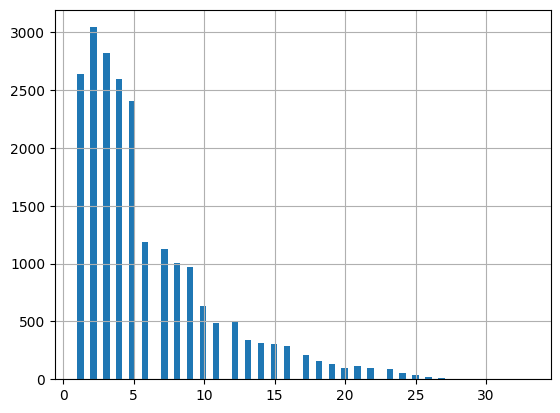

In [96]:
df['floor'].hist(bins = 70);

Квартир на 1-5 этажах примерно одинаковое количество, далее идет уменьшение, скорее всего это связано с тем, что в питере еще много 5ти этажек, далее идут 9ти, уже потом все остальные.


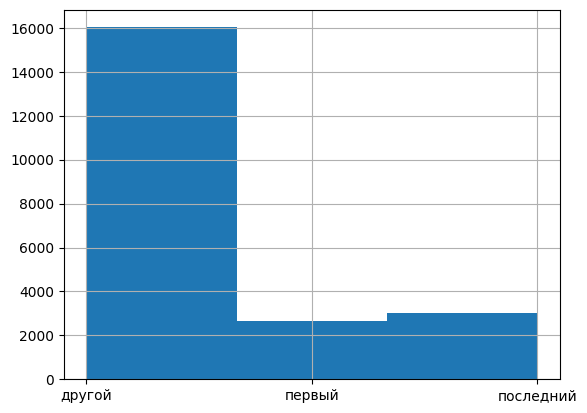

In [97]:
df['floor_status'].hist(bins=3);

Ничего необычного, тк "других" этажей явно больше чем первых и последних.

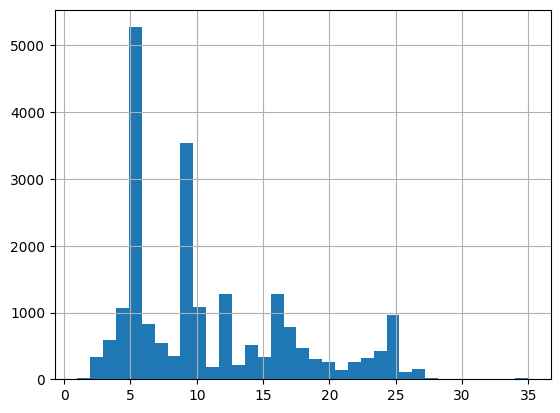

In [98]:
df['floors_total'].hist(bins=35, range=(1,35));

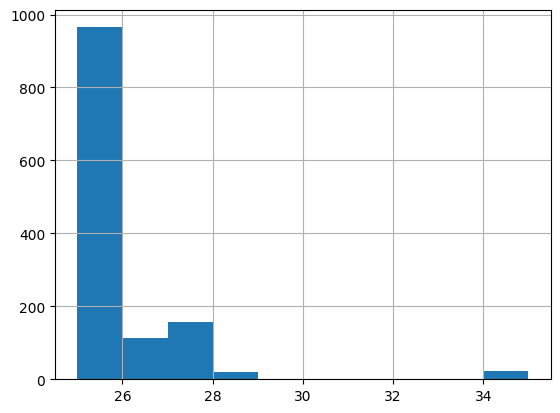

In [99]:
df['floors_total'].hist(range=(25,35));

Может так совпало, что на 29 - 33 этажах не продаются квартиры, а может и какая-то ошибка. В целом остальное распределение выгоядит хорошо.

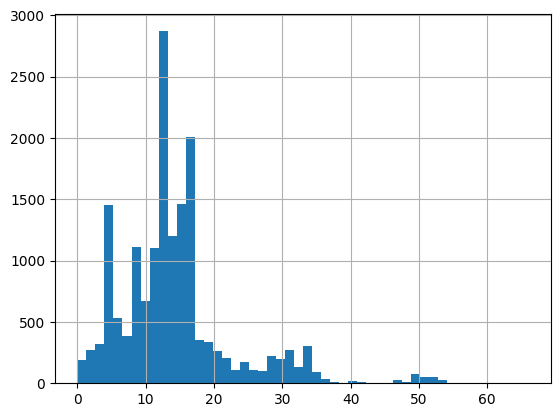

In [100]:
df['to_center_km'].hist(bins = 50);

Очень большой разброс, но и квартир в области очень много.

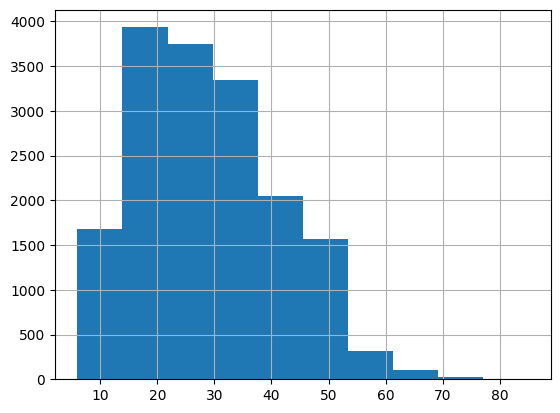

In [101]:
df['to_airport_km'].hist();

Ничего необычного.

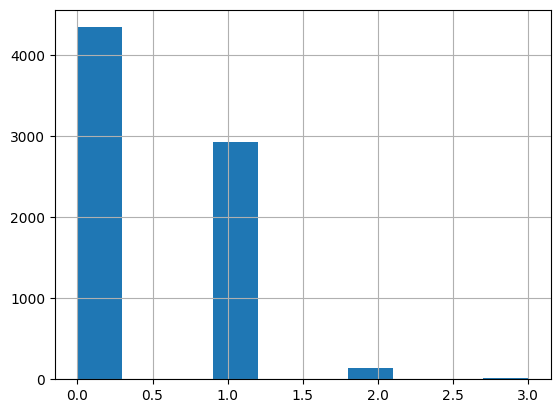

In [102]:
df['to_park_km'].hist();

И тут вроде хорошо. В блоке фитрации было пару квартир очень близко к парку, но я их оставил.

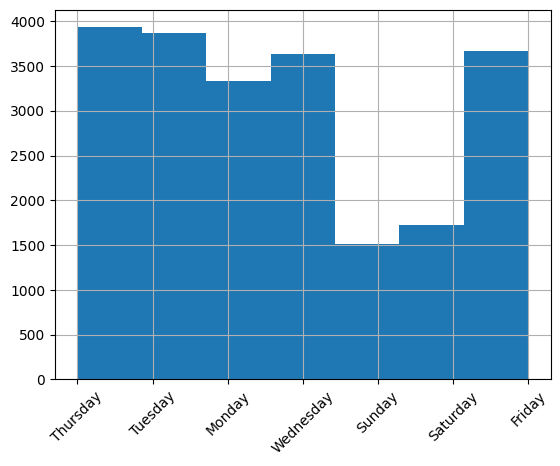

In [103]:
df['day_of_week_exposition'].hist(bins=7);
plt.xticks(rotation=45);

В выходные продажи реже будней.

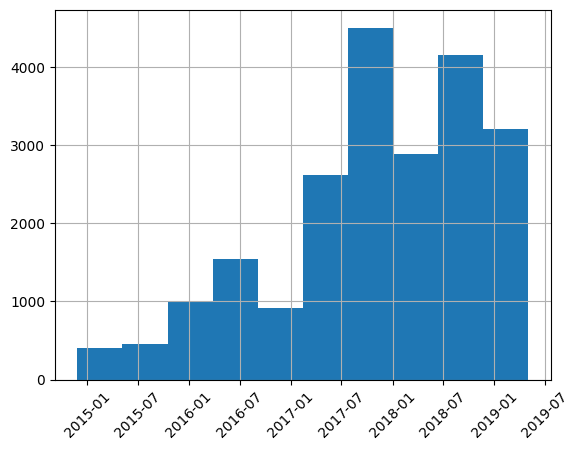

In [104]:
df['first_day_exposition'].hist();
plt.xticks(rotation=45);

Пик начала продаж приходится на 2017 год, возможно как-то поменялся рынок недвижимости или было построено много домов, не силен в этом.

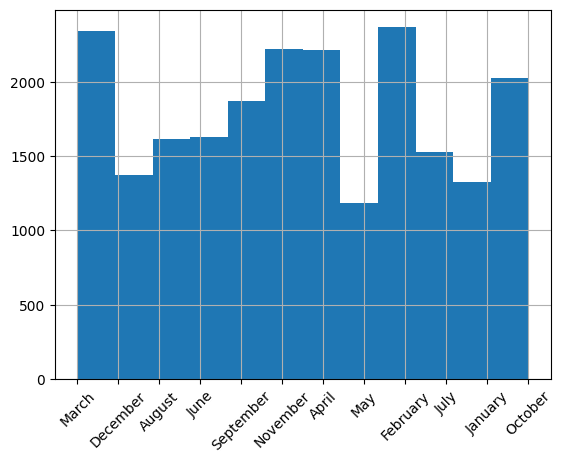

In [105]:
df['month_exposition'].hist(bins = 12);
plt.xticks(rotation=45);

Видимо люди летом в отпусках, а в декабре/январе и мае отдыхают на праздниках, а не продают квартиры.

Посмотрим как быстро продавались квартиры.

In [106]:
df['days_exposition'].describe()

count    18683.000000
mean       184.566665
std        221.457980
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

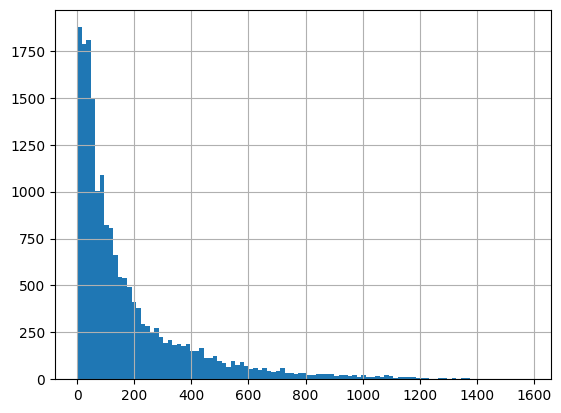

In [107]:
df['days_exposition'].hist(bins=100);

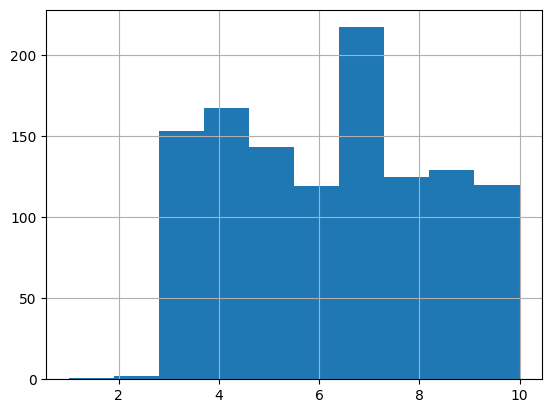

In [108]:
df['days_exposition'].hist(range=(1,10));

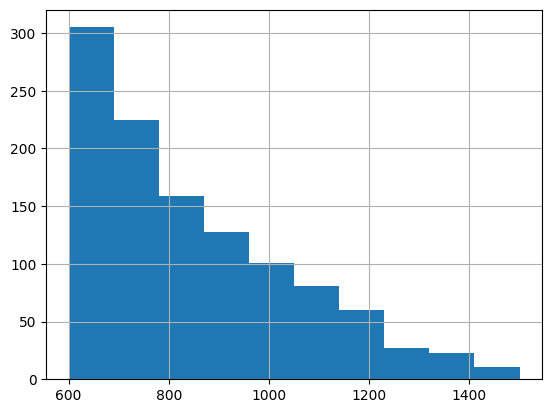

In [109]:
df['days_exposition'].hist(range=(600,1500));

In [110]:
days=df.pivot_table(index = ['last_price', 'total_area', '1m_price'], values = ['days_exposition'], aggfunc=['median'])
days.columns=['days_median']
days.sort_values('days_median')

,,,days_median
last_price,total_area,1m_price,
4000000.0,49.90,80160.32,1.0
4070000.0,45.10,90243.90,2.0
6100000.0,51.40,118677.04,2.0
6417500.0,75.50,85000.00,3.0
8500000.0,74.80,113636.36,3.0
...,...,...,...
4400000.0,42.98,102373.20,1512.0
13300000.0,79.60,167085.43,1513.0
10600000.0,80.00,132500.00,1553.0


In [111]:
df['days_exposition'].describe()

count    18683.000000
mean       184.566665
std        221.457980
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим что 50% объявлений закрывается примерно за 100 дней, остальная часть закрывается к 230му дню, ближе к максимум значения до 1500 дней, очень странные объявления, возможно хозяева не сильно торопились продавать, раз уж прошло около 5ти лет, но тем не менее. Что касается быстрых сделок, скорее всего они были договорные, может на иных сайтах, и в последствии закрыты за несколько дней для поднятия статистики на сайте, особо незнаю что и предполагать.

Посмотрим от чего зависит стоимость квартиры.

In [112]:
p_total = df.pivot_table(index='total_area', values='last_price', aggfunc='median')
p_total.sort_values('last_price')

,last_price
total_area,
26.40,650000.0
28.66,690000.0
28.60,1060000.0
54.33,1300000.0
29.62,1300000.0
...,...
218.00,79339000.0
181.10,82400000.0
145.70,85000000.0


In [113]:
p_total.describe()

,last_price
count,1.978000e+03
mean,9.673746e+06
std,9.897269e+06
min,6.500000e+05
25%,3.990000e+06
50%,6.200000e+06
75%,1.187296e+07
max,9.500000e+07


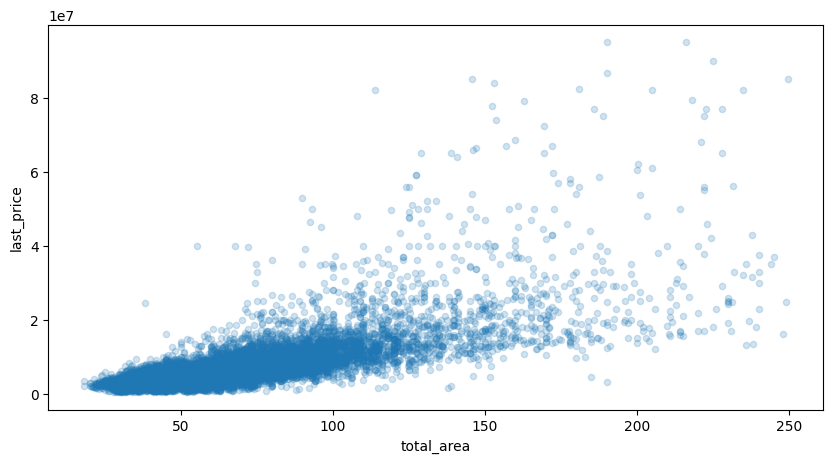

In [114]:
df.plot(kind='scatter', x='total_area', y='last_price', alpha=0.2, figsize=(10,5));

In [115]:
df['total_area'].corr(df['last_price'])

0.7455083198286314

Наблюдается зависимость цены от общей площади.

In [116]:
p_liv = df.pivot_table(index='living_area', values='last_price', aggfunc='median')
p_liv.sort_values('living_area')

,last_price
living_area,
2.000,4340000.0
3.000,34715000.0
5.000,2680000.0
5.400,6100000.0
6.000,3799000.0
...,...
184.000,33000000.0
187.800,37800000.0
200.000,65000000.0


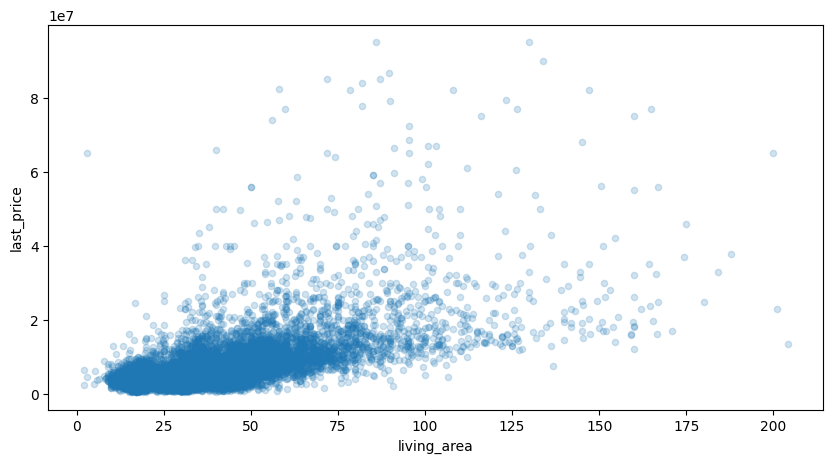

In [117]:
df.plot(kind='scatter', x='living_area', y='last_price', alpha=0.2, figsize=(10,5));

In [118]:
df['living_area'].corr(df['last_price'])

0.6381819271876025

Картина такая же, ожидаемо, ведь жилая площадь напрямую зависит от общей.

In [119]:
p_kit = df.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
p_kit.sort_values('last_price')

,last_price
kitchen_area,
13.540,790000.0
10.200,800000.0
5.910,1300000.0
5.888,1315000.0
10.140,1400000.0
...,...
28.630,79339000.0
93.200,82400000.0
20.310,85000000.0


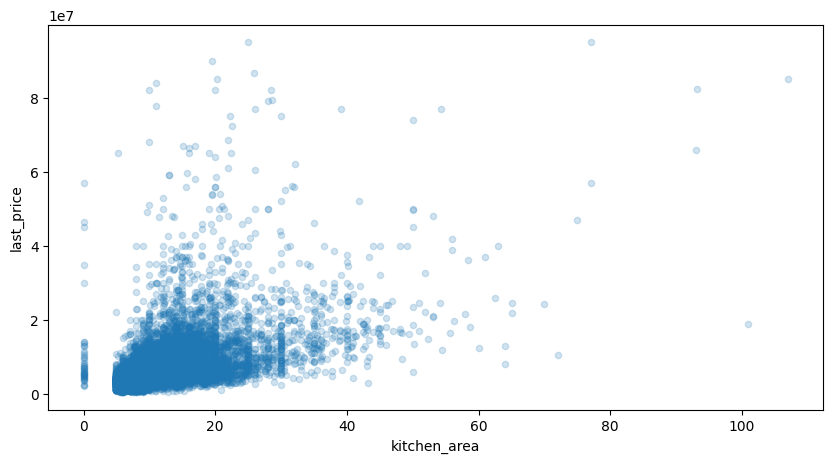

In [120]:
df.plot(kind='scatter', x='kitchen_area', y='last_price', alpha=0.2, figsize=(10,5));

In [121]:
df['kitchen_area'].corr(df['last_price'])

0.5505948430108827

Зависимость чуть меньше, тк в некоторых квартирах просто "нет" кухонь.

In [122]:
p_rooms = df.pivot_table(index='rooms', values='last_price', aggfunc='median')
p_rooms.sort_values('last_price')

,last_price
rooms,
0,2810000.0
1,3600000.0
2,4800000.0
3,6200000.0
4,9000000.0
5,13000000.0
6,16525000.0
7,18000000.0


<Axes: xlabel='rooms'>

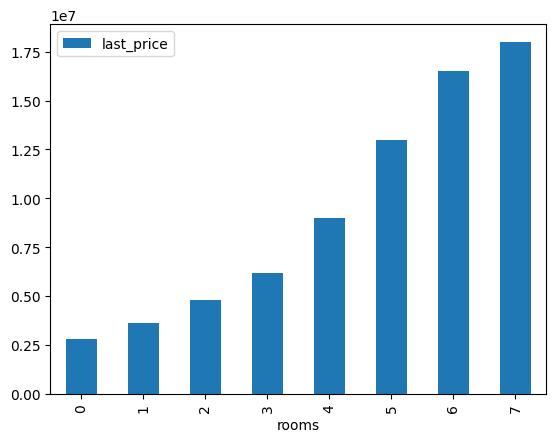

In [123]:
p_rooms.plot(kind = 'bar')

In [124]:
df['rooms'].corr(df['last_price'])

0.4524426086884014

Чем больше комнат, тем больше цена, ведь количество комнат тоже зависит от общей площади.

In [125]:
p_floor = df.pivot_table(index='floor_status', values='last_price', aggfunc='median')
p_floor.sort_values('last_price')

,last_price
floor_status,
первый,3950000.0
последний,4350000.0
другой,4860000.0


<Axes: xlabel='floor_status'>

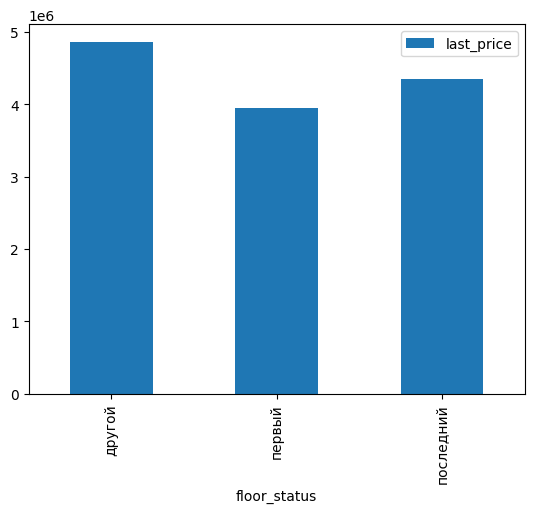

In [126]:
p_floor.plot.bar()

Тип этажа в целом не влияет на стоимость квартиры.

In [127]:
p_day = df.pivot_table(index='day_of_week_exposition', values='last_price', aggfunc='median')
p_day.sort_values('last_price')

,last_price
day_of_week_exposition,
Sunday,4550000.0
Friday,4600000.0
Saturday,4600000.0
Monday,4700000.0
Thursday,4700000.0
Tuesday,4750000.0
Wednesday,4750000.0


In [128]:
p_month = df.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
p_month.sort_values('last_price')

,last_price
month_exposition,
June,4460000.0
May,4550000.0
October,4572500.0
August,4600000.0
July,4600000.0
January,4699500.0
February,4700000.0
March,4700000.0
November,4700000.0


In [129]:
p_year = df.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
p_year.sort_values('last_price')

,last_price
year_exposition,
2017,4500000.0
2016,4550000.0
2018,4600000.0
2019,5050000.0
2015,5300000.0
2014,7580000.0


<Axes: xlabel='day_of_week_exposition'>

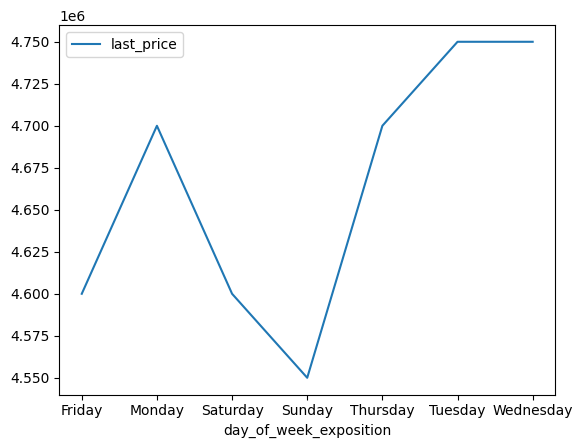

In [130]:
p_day.plot()

<Axes: xlabel='month_exposition'>

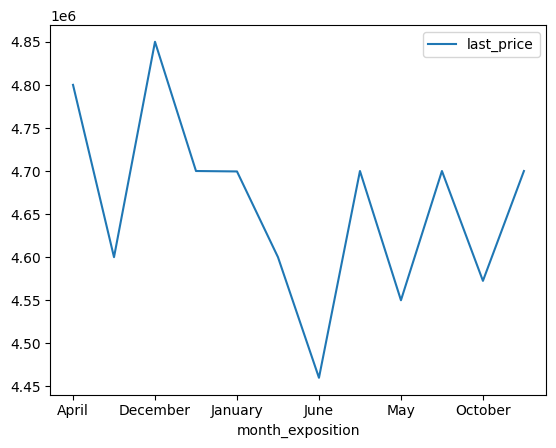

In [131]:
p_month.plot()

<Axes: xlabel='year_exposition'>

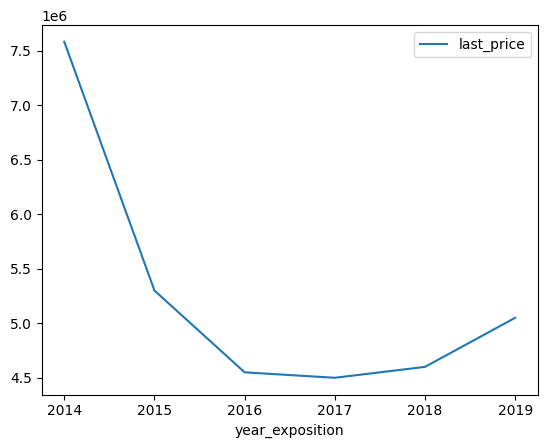

In [132]:
p_year.plot()

День недели и месяц никак не влияют на стоимость квартиры, а вот в 2014 году было закрыто больше дорогих сделок. В 2016 году большая просадка и далее плавный подъем.

In [133]:
d_area_pivot = df.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = ['count', 'mean'])
d_area_pivot.columns=['count', 'mean']

In [134]:
d_area_pivot

,count,mean
year_exposition,,
2014,127,83.023622
2015,1103,68.315440
2016,2610,60.888146
2017,7547,59.110261
2018,7569,57.140231
2019,2728,57.927841


Видно что средняя площадь квартир падает, при этом пик объявлений падает на 2017/18 годы. В 2014 году слишком мало объявлений, возможно это связано с непопулярностью сервиса Янедвижимость в те годы, незнаю..

Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [135]:
temp_1=df.pivot_table(index='locality_name', values='1m_price', aggfunc='count')
temp_1.columns=['1m_count']
temp_2=df.pivot_table(index='locality_name', values='1m_price')

In [136]:
city_stat = temp_1.merge(temp_2, on='locality_name').sort_values('1m_count', ascending=False).head(10)
city_stat['1m_count'] = city_stat['1m_count'].round()
city_stat['1m_price']= city_stat['1m_price'].round()

In [137]:
city_stat

,1m_count,1m_price
locality_name,,
санкт-петербург,14525,112878.0
поселок мурино,479,85574.0
поселок шушары,404,78477.0
всеволожск,366,68944.0
пушкин,338,103420.0
колпино,326,75269.0
поселок парголово,301,90414.0
гатчина,290,68800.0
деревня кудрово,252,92271.0


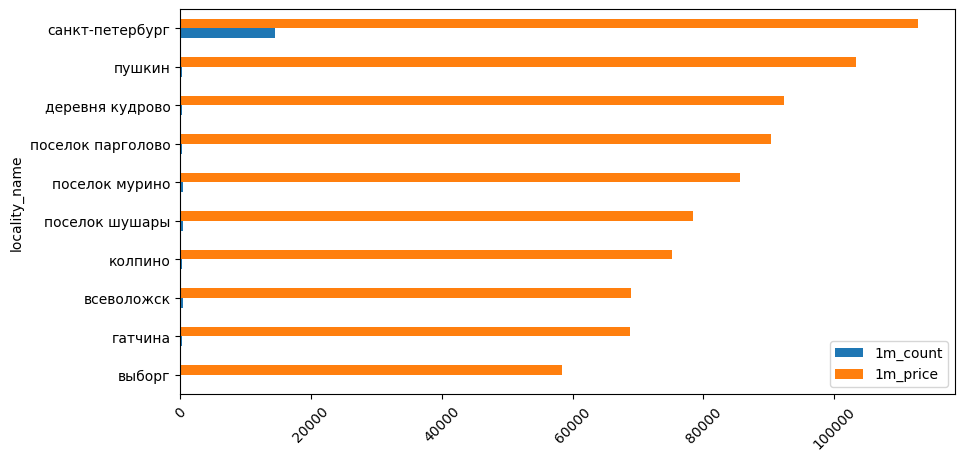

In [138]:
city_stat.sort_values(by = '1m_price', ascending = True).plot(kind= 'barh', figsize=(10,5), legend = True, fontsize = 10)
plt.xticks(rotation=45);

Естественно Питер будет на первом месте, после него можем наблюдать топ локаций по количеству объявлений.

Посчитаем цену каждого километра в Питере.

In [139]:
df_peter = df.query('locality_name == "санкт-петербург"').reset_index()
df_peter

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category,1m_price,day_of_week_exposition,month_exposition,year_exposition,floor_status,to_center_km,to_airport_km,to_park_km,to_pond_km
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000,8,0,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,5_rooms,120370.37,Thursday,March,2019,другой,16.0,19.0,0.0,1.0
1,2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300,4,0,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,3_rooms,92785.71,Thursday,August,2015,другой,14.0,22.0,0.0,1.0
2,4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000,13,0,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,4_rooms,100000.00,Tuesday,June,2018,другой,8.0,32.0,0.0,0.0
3,7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,45.540,22,0,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,3_rooms,110544.69,Thursday,April,2019,другой,12.0,24.0,NaN,NaN
4,9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600,7,0,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,3_rooms,88524.59,Sunday,February,2017,другой,15.0,51.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14520,23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300,4,0,False,False,9.10,2,санкт-петербург,17284.0,16081.0,1,353.0,2,652.0,29.0,1_room,100566.57,Wednesday,February,2018,другой,16.0,17.0,0.0,1.0
14521,23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.000,2,0,False,False,6.00,0,санкт-петербург,20151.0,6263.0,1,300.0,0,NaN,15.0,2_rooms,105769.23,Thursday,July,2018,другой,6.0,20.0,0.0,NaN
14522,23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300,7,0,False,False,10.60,1,санкт-петербург,19424.0,4489.0,0,NaN,1,806.0,519.0,3_rooms,129903.98,Thursday,October,2016,другой,4.0,19.0,NaN,1.0
14523,23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300,3,0,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,5_rooms,72490.85,Tuesday,March,2017,другой,4.0,25.0,1.0,0.0


In [140]:
df_peter['1km_price'] = df_peter['last_price']/df['to_center_km']
df_peter['1km_price'] = df_peter['1km_price'].round(decimals=2)
df_peter

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category,1m_price,day_of_week_exposition,month_exposition,year_exposition,floor_status,to_center_km,to_airport_km,to_park_km,to_pond_km,1km_price
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000,8,0,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,5_rooms,120370.37,Thursday,March,2019,другой,16.0,19.0,0.0,1.0,812500.00
1,2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300,4,0,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,3_rooms,92785.71,Thursday,August,2015,другой,14.0,22.0,0.0,1.0,273473.68
2,4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000,13,0,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,4_rooms,100000.00,Tuesday,June,2018,другой,8.0,32.0,0.0,0.0,714285.71
3,7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,45.540,22,0,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,3_rooms,110544.69,Thursday,April,2019,другой,12.0,24.0,NaN,NaN,NaN
4,9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600,7,0,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,3_rooms,88524.59,Sunday,February,2017,другой,15.0,51.0,NaN,NaN,675000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14520,23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300,4,0,False,False,9.10,2,санкт-петербург,17284.0,16081.0,1,353.0,2,652.0,29.0,1_room,100566.57,Wednesday,February,2018,другой,16.0,17.0,0.0,1.0,221875.00
14521,23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.000,2,0,False,False,6.00,0,санкт-петербург,20151.0,6263.0,1,300.0,0,NaN,15.0,2_rooms,105769.23,Thursday,July,2018,другой,6.0,20.0,0.0,NaN,366666.67
14522,23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300,7,0,False,False,10.60,1,санкт-петербург,19424.0,4489.0,0,NaN,1,806.0,519.0,3_rooms,129903.98,Thursday,October,2016,другой,4.0,19.0,NaN,1.0,1578333.33
14523,23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300,3,0,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,5_rooms,72490.85,Tuesday,March,2017,другой,4.0,25.0,1.0,0.0,746153.85


<Axes: xlabel='to_center_km', ylabel='1km_price'>

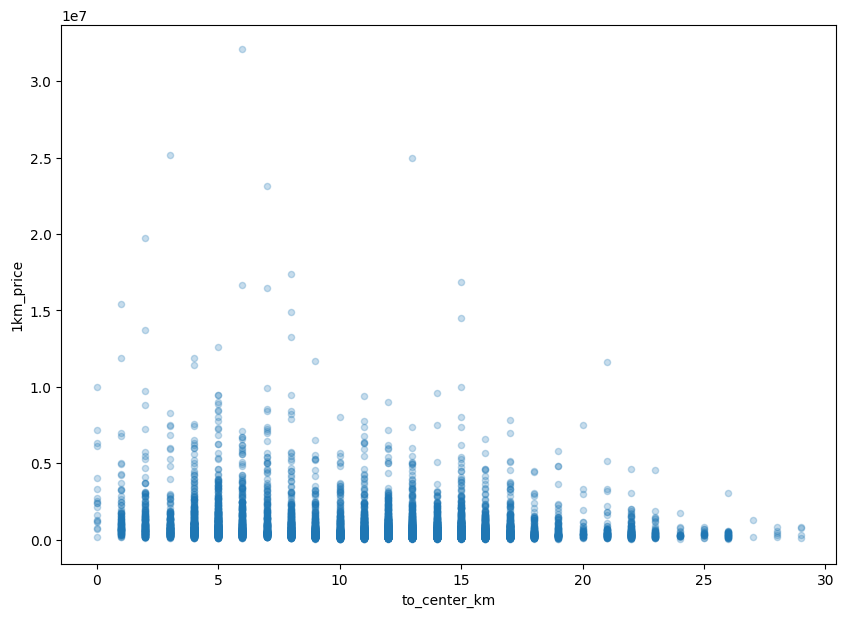

In [141]:
df_peter.plot.scatter(x='to_center_km', y='1km_price', alpha=0.25, figsize=(10,7))

In [142]:
df_peter['1km_price'].corr(df['to_center_km'])

nan

Есть небольшая зависимость, чем дальше от центра тем меньше цена, но она не сильно просматривается. Есть выбивающиеся дорогие квартиры в самом центре.

Разобью на категории и проверю еще раз.

In [143]:
def center_cat(row):
    s=row['to_center_km']
    if (s <= 1.5):
        return 'center'
    if (s <= 5):
        return 'middle'
    if s <= 15:
        return 'far'
    if s <= 50:   
        return 'far_away'

df_peter['center_category']=df_peter.apply(center_cat, axis=1)

In [144]:
df_peter

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category,1m_price,day_of_week_exposition,month_exposition,year_exposition,floor_status,to_center_km,to_airport_km,to_park_km,to_pond_km,1km_price,center_category
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000,8,0,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,5_rooms,120370.37,Thursday,March,2019,другой,16.0,19.0,0.0,1.0,812500.00,far_away
1,2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300,4,0,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,3_rooms,92785.71,Thursday,August,2015,другой,14.0,22.0,0.0,1.0,273473.68,far
2,4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000,13,0,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,4_rooms,100000.00,Tuesday,June,2018,другой,8.0,32.0,0.0,0.0,714285.71,far
3,7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,45.540,22,0,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,3_rooms,110544.69,Thursday,April,2019,другой,12.0,24.0,NaN,NaN,NaN,far
4,9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600,7,0,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,3_rooms,88524.59,Sunday,February,2017,другой,15.0,51.0,NaN,NaN,675000.00,far
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14520,23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300,4,0,False,False,9.10,2,санкт-петербург,17284.0,16081.0,1,353.0,2,652.0,29.0,1_room,100566.57,Wednesday,February,2018,другой,16.0,17.0,0.0,1.0,221875.00,far_away
14521,23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.000,2,0,False,False,6.00,0,санкт-петербург,20151.0,6263.0,1,300.0,0,NaN,15.0,2_rooms,105769.23,Thursday,July,2018,другой,6.0,20.0,0.0,NaN,366666.67,far
14522,23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300,7,0,False,False,10.60,1,санкт-петербург,19424.0,4489.0,0,NaN,1,806.0,519.0,3_rooms,129903.98,Thursday,October,2016,другой,4.0,19.0,NaN,1.0,1578333.33,middle
14523,23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300,3,0,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,5_rooms,72490.85,Tuesday,March,2017,другой,4.0,25.0,1.0,0.0,746153.85,middle


In [145]:
peter_pivot = df_peter.pivot_table(index = 'center_category', values = 'last_price', aggfunc = 'median') 
peter_pivot.columns = ['price']
peter_pivot.sort_values('price')

,price
center_category,
far_away,4650259.0
far,5300000.0
middle,9170000.0
center,11490000.0


<Axes: ylabel='center_category'>

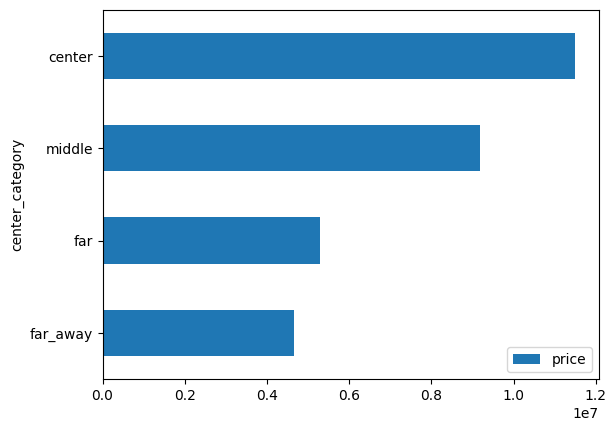

In [146]:
peter_pivot.sort_values('price').plot.barh()

Все равно выходит, что квартиры ближе к центру дороже остальных.

### Общий вывод

**Общий вывод.**

В ходе анализа данных по сервису Яндекс Недвижимость была проделана следующая работа:
- предобработка данных, а именно: замена пропусков и удаление аномальных значений, изменение некоторых типов файлов.
- добавление новых столбцов в таблицу для более лучшего понимания картины(цена за 1 кв.м., тип этажа, разбивка по дням и месяцам даты объявления)
- исследование основных категорий данных с построением промежуточных таблиц и графиков

Основной задачей было понять - от чего зависит стоимость квартиры.
Были найдены следующие зависимости:
- Стоимость квартиры сильно зависит зависит от общей площади, что видно по коэффициенту корреляции (0.75) и далее подтверждено сводной таблицей с графиком зависимости. Зависимость от жилой площади, площади кухни и количества комнат - косвенная, тк все сводится к общей площади.
- Также стоимость квартир зависит от расстояния до центра города: в центре стоимость около 11.5 млн, за центром уже 9млн, еще дальше уже 5млн.
- Зависимость от даты размещения: средняя площадь квартир на прмежутке с 2014-2019гг упала с 83 до 57 кв.м, при этом количество объявлений очень сильно выросло к 2017-18 годам, потом пошло на спад.